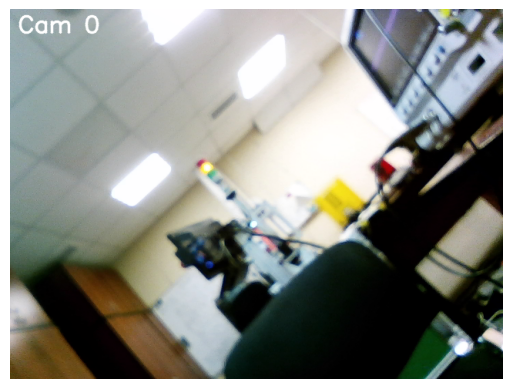

In [1]:
# ...existing code...
import cv2
import numpy as np
import sys
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def combine_cameras_horizontal(idx_left=0, idx_right=1, width_each=640, height=480, backend=cv2.CAP_DSHOW):
    """
    Открывает две камеры и показывает их поток в одном горизонтально объединённом окне.
    В ноутбуке отображает кадры inline (matplotlib); в скрипте — отдельное окно OpenCV.
    Нажмите 'q' или ESC чтобы выйти.
    """
    is_notebook = 'ipykernel' in sys.modules

    capL = cv2.VideoCapture(idx_left, backend)
    capR = cv2.VideoCapture(idx_right, backend)
    time.sleep(0.1)

    if not capL.isOpened() and not capR.isOpened():
        print(f"Ни одна из камер {idx_left}, {idx_right} не доступна")
        return

    if is_notebook:
        print("Running in notebook — frames will be shown inline (use Ctrl-C to stop).")
    else:
        win_name = f"Stereo {idx_left}-{idx_right}"
        cv2.namedWindow(win_name, cv2.WINDOW_NORMAL)
        cv2.resizeWindow(win_name, width_each * 2, height)

    try:
        while True:
            frames = []
            # read left
            if capL.isOpened():
                retL, fL = capL.read()
                if not retL:
                    capL.release()
                else:
                    frames.append(('L', fL))
            # read right
            if capR.isOpened():
                retR, fR = capR.read()
                if not retR:
                    capR.release()
                else:
                    frames.append(('R', fR))

            if not frames:
                print("Кадры отсутствуют — выход")
                break

            # prepare list of images in order L then R (if present)
            ordered = []
            for tag in ('L','R'):
                for t,f in frames:
                    if t == tag:
                        # resize to same height, and width_each
                        img = cv2.resize(f, (width_each, height))
                        # put label
                        cv2.putText(img, f"Cam {idx_left if tag=='L' else idx_right}",
                                    (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
                        ordered.append(img)
                        break

            # if only one camera available, show single frame; if two — stack horizontally
            combined = ordered[0] if len(ordered) == 1 else np.hstack(ordered)

            if is_notebook:
                rgb = cv2.cvtColor(combined, cv2.COLOR_BGR2RGB)
                clear_output(wait=True)
                plt.figure(figsize=(combined.shape[1]/100, combined.shape[0]/100))
                plt.imshow(rgb)
                plt.axis('off')
                display(plt.gcf())
                plt.close()
                time.sleep(0.03)
            else:
                cv2.imshow(win_name, combined)
                key = cv2.waitKey(1) & 0xFF
                if key == ord('q') or key == 27:
                    break

    except KeyboardInterrupt:
        pass
    finally:
        if capL.isOpened(): capL.release()
        if capR.isOpened(): capR.release()
        if not is_notebook:
            cv2.destroyAllWindows()

# Пример
if __name__ == "__main__":
    combine_cameras_horizontal(0, 1)
# ...existing code...

In [ ]:
import cv2
import numpy as np
import sys
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from datetime import datetime

сapL = cv2.VideoCapture(0)
capR = cv2.VideoCapture(1)

сapL.set(cv2.CAP_PROP_FRAME_WIDTH, int(1920))
сapL.set(cv2.CAP_PROP_FRAME_HEIGHT, int(1080))
capR.set(cv2.CAP_PROP_FRAME_WIDTH, int(1920))
capR.set(cv2.CAP_PROP_FRAME_HEIGHT, int(1080))

time.sleep(0.2)

num = 0

while True:

    retL, fL = сapL.read()
    retR, fR = capR.read()

    origR = fR.copy()
    origL = fL.copy()

    cv2.imshow('Камера', origR)

    key = cv2.waitKey(1) & 0xFF
 
    if key == ord('q'):  # Выход
        break


    if key == ord('s'):
        cam_idx = 0
        h, w = origR.shape[:2]
        ts = datetime.now().strftime("%Y%m%d_%H%M%S")
        fname = f"cam_R{num:06d}.png"
        try:
            ok = cv2.imwrite(fname, origR)
            if ok:
                print(f"Saved {fname}")
            else:
                print(f"Failed to save {fname}")
        except Exception as e:
            print(f"Error saving {fname}: {e}")

        cam_idx = 1
        h, w = origL.shape[:2]
        fname = f"cam_L{num:06d}.png"
        try:
            ok = cv2.imwrite(fname, origL)
            if ok:
                print(f"Saved {fname}")
            else:
                print(f"Failed to save {fname}")
        except Exception as e:
            print(f"Error saving {fname}: {e}")

        num = num + 1
    

cv2.destroyAllWindows()

In [16]:
cv2.destroyAllWindows()